# Linear Regression

$\textit{Author:}$ Simon Guldager \
$\textit{Date:}$ 11-09-2024

In [1]:
import os
import warnings

# Data handling and manipulation library
import pandas as pd
# Data visualization library based on matplotlib
import seaborn as sns
# Basic plotting library in Python
import matplotlib.pyplot as plt
# Library for numerical operations in Python
import numpy as np

# Splits data into random train and test subsets
from sklearn.model_selection import train_test_split
# Generates a confusion matrix
from sklearn.linear_model import LinearRegression, Ridge, Lasso


## some stuff for making pretty plots
from matplotlib import rcParams
from cycler import cycler

## Set plotting style and print options
sns.set_theme()
sns.set_style("whitegrid")
sns.set_context("paper") #Possible are paper, notebook, talk and poster
# Set figure format
wide_format, square_format = False, True
if wide_format:
    d = {'lines.linewidth': 2, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12,\
     'legend.fontsize': 15, 'font.family': 'serif', 'figure.figsize': (9,6)}
if square_format:
    d = {'lines.linewidth': 2, 'axes.titlesize': 16, 'axes.labelsize': 14, 'xtick.labelsize': 10, 'ytick.labelsize': 10,\
     'legend.fontsize': 12, 'font.family': 'serif', 'figure.figsize': (6,6)}
    
d_colors = {'axes.prop_cycle': cycler(color = ['teal', 'navy', 'coral', 'plum', 'purple', 'olivedrab',\
         'black', 'red', 'cyan', 'yellow', 'khaki','lightblue'])}
rcParams.update(d)
rcParams.update(d_colors)

# Data Preperation and Cleaning

### Import the 'descriptives' dataset
we will work on health descriptives dataset for this exercise.


In [2]:
# set the relative directory of the health data csv
data_dir = 'data_processed'
df = pd.read_csv(os.path.join(data_dir, 'health_data_cleaned.csv'))
df = df.apply(lambda x: x.replace(',', '.', regex=True))

# set the string column(s)
str_cols = ['brick']
# extract numerical columns
num_cols = list(df.columns.difference(str_cols))

# convert num_cols column(s) to numerical
df[num_cols] = df[num_cols].astype(float)

# choose which columns to drop
drop_cols = ['brick', 'brick_nr']
df_num = df.drop(drop_cols, axis=1)
df_num.head(6)

,blood clot in heart,absence,life_expectancy_years,longterm_disease_andel,overweight_andel,t2d_patients,uddannelse_lang_amount,physical_activity
0,0.0205,6.286500,77.190500,0.406500,0.175500,2248.978472,6035.258672,0.302000
1,0.0090,5.747333,79.967667,0.326667,0.130333,6136.772115,64810.874712,0.243333
2,0.0075,5.499500,79.283000,0.305000,0.107500,3019.148357,44280.909321,0.221500
3,0.0080,5.580000,80.050000,0.307500,0.100000,3387.602593,49553.419564,0.225000
4,0.0080,5.537500,79.645500,0.306000,0.104000,3574.931136,52262.047446,0.223000
5,0.0136,6.128600,80.101800,0.378400,0.184000,7612.328605,32230.668250,0.312800


# Correlation Matrix

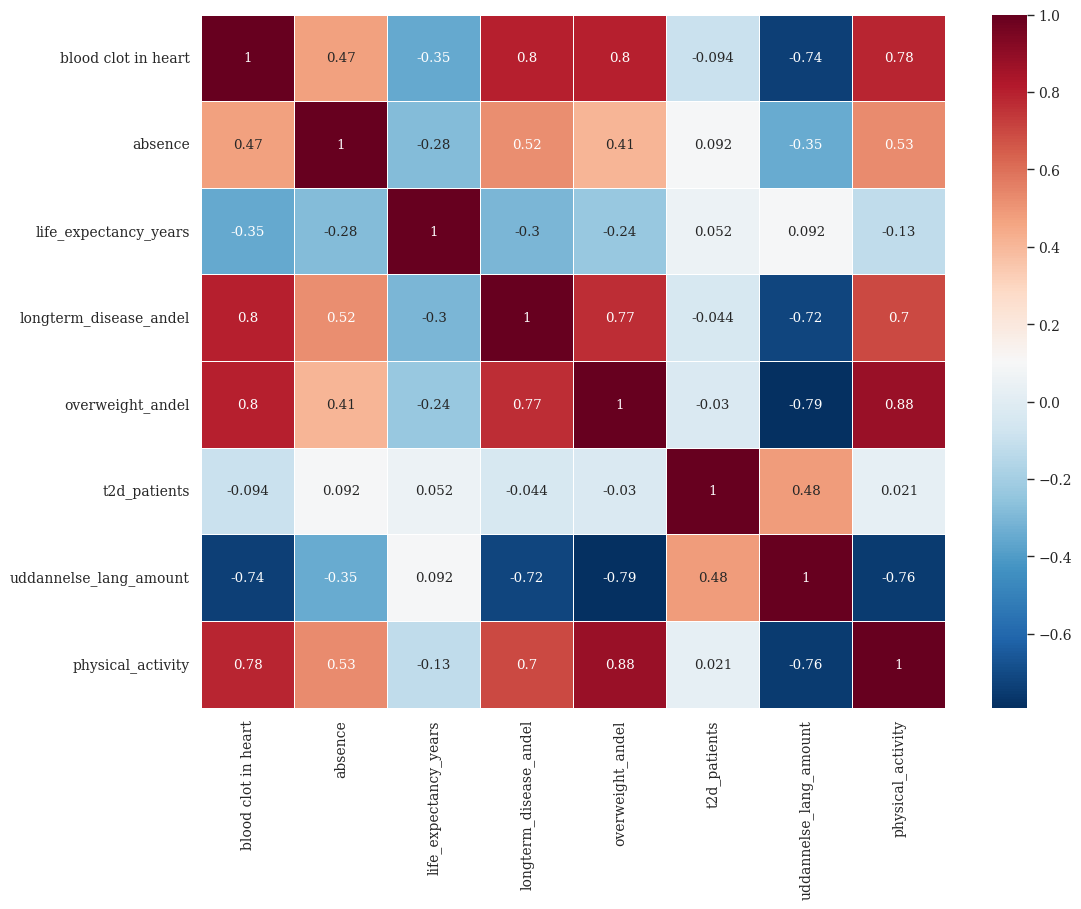

In [3]:
# Compute the pairwise Pearson correlation matrix for df.
# The Pearson correlation coefficient measures the linear relationship between two variables.
# Its value ranges from -1 to 1, where:
# - 1 implies a perfect positive linear relationship,
# - -1 implies a perfect negative linear relationship, and
# - 0 implies no linear relationship.
corr = df_num.corr(method='pearson')

# Create a new figure and axis with a specified size.
# Adjust the figsize values to change the size of each cell in the heatmap.
fig, ax = plt.subplots(figsize=(12, 9))

# Create a heatmap using Seaborn.
# - `corr`: The computed correlation matrix.
# - `xticklabels` & `yticklabels`: Use the columns of the correlation matrix for labeling the x and y axis respectively.
#   blue represents positive correlations and red represents negative correlations.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu_r', annot=True, linewidth=0.5, ax=ax);



#### Linear regression on easy-mode: 1 independent and 1 target variable

The idea is then to choose a feature from df, and then use linear regression to predict the values of another variable

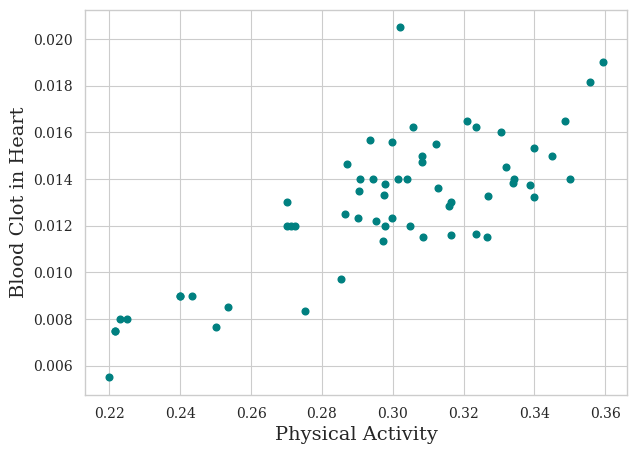

In [4]:
# Choose an independent variable
independent_variables = ['physical_activity']
X = df_num[independent_variables].values

# Create target variable from the DataFrame
# This is the dependent variable we are interested in predicting or analyzing
y = df['blood clot in heart'].values

# Let's have a look
fig, ax = plt.subplots(figsize=(7,5))
ax.set(xlabel='Physical Activity', ylabel='Blood Clot in Heart')
ax.plot(X, y, 'o');

Although linear least squares doesn't need training like ML models, we will still fit the model using some of the data, and then see how well it makes predictions on the unseen data

Relative error on predictions: 8.743 %
R squared: 0.647


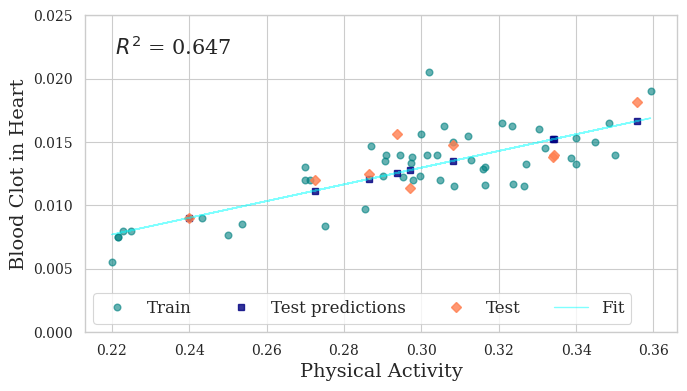

In [5]:
# Split into test and train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=43)

# Initialize the regressor, fit and predict
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# calculate the R^2 score and relative error 
rsquared = reg.score(X_test, y_test)
rel_error = np.mean(np.abs(y_test - y_pred) / y_test)

print(f'Relative error on predictions: {rel_error * 100 :.3f} %')
print(f'R squared: {rsquared:.3f}')

# get the slope and intercept of the linear regression line
slope = reg.coef_
intercept = reg.intercept_

# plot the data points and the linear regression line
fig, ax = plt.subplots(figsize=(7,4))
ax.set(xlabel='Physical Activity', ylabel='Blood Clot in Heart', ylim =[0,0.025])

ax.plot(X_train, y_train, 'o', label = 'Train', alpha=.6)
ax.plot(X_test, y_pred, 's', label = 'Test predictions', alpha=.8)
ax.plot(X_test, y_test, 'D', label = 'Test', alpha=.8)
ax.plot(X, slope * X + intercept, '-', label = 'Fit', lw=1, color='cyan', alpha=.5)
ax.text(0.15, 0.9, rf'$R^2$ = {rsquared:.3f}', fontsize=15, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
ax.legend(ncol=4, loc='lower left')
fig.tight_layout();

Let's include more independent variables \& repeat the analysis 

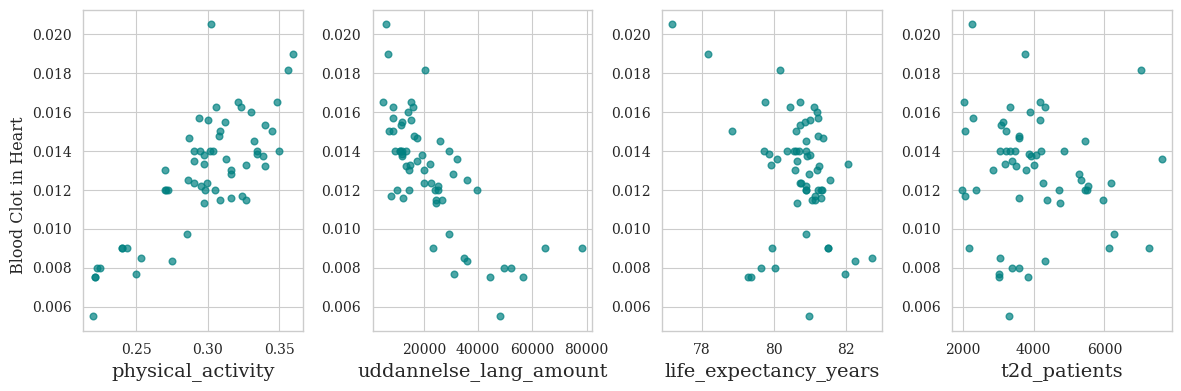

In [6]:
# choose variables
independent_variables = ['physical_activity','uddannelse_lang_amount','life_expectancy_years', 't2d_patients']
Nfeatures = len(independent_variables)
X = df_num[independent_variables].values
# choose target variable
y = df['blood clot in heart'].values

# split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

# plot target variable vs each ind. variable
fig, ax = plt.subplots(ncols = Nfeatures, figsize=(3*Nfeatures,4))
fig.supylabel('Blood Clot in Heart')

for i in range(Nfeatures):
    ax[i].set(xlabel=independent_variables[i])
    ax[i].plot(X[:,i], y, 'o', alpha=.7)
fig.tight_layout()

Relative error: 15.005 %
R squared: 0.113


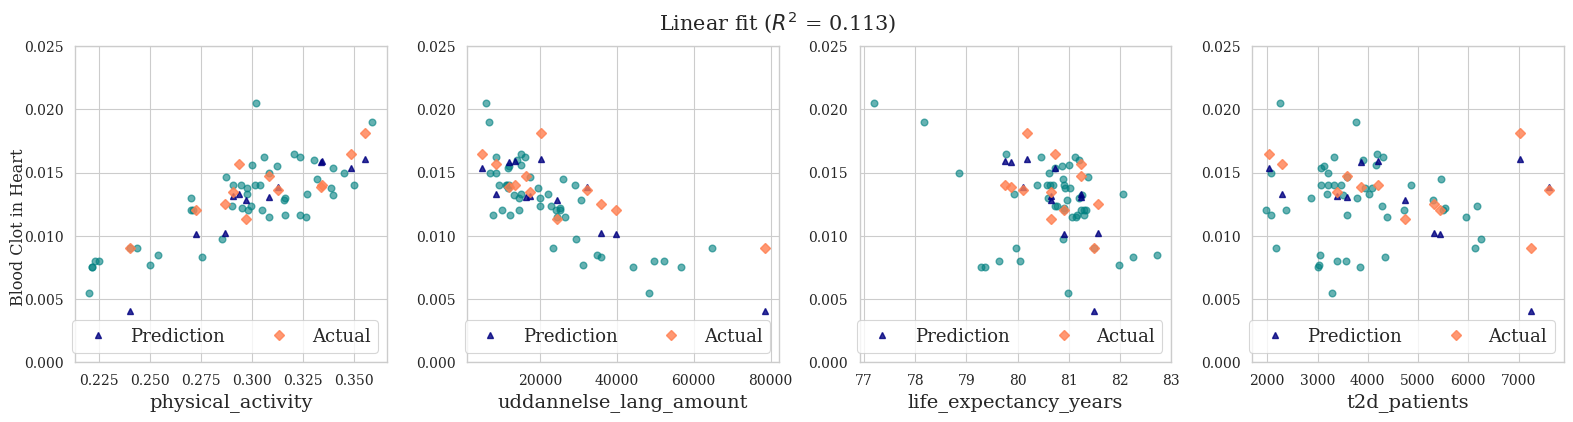

In [7]:
# instantiate regressor, fit and predict
reg = LinearRegression() 
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# calculate the R^2 score
rsquared = reg.score(X_test, y_test)
rel_error = np.mean(np.abs(y_test - y_pred) / y_test)

print(f'Relative error: {rel_error * 100 :.3f} %')
print(f'R squared: {rsquared:.3f}')

# get the slope and intercept of the linear regression line
slope = reg.coef_
intercept = reg.intercept_

# plot target variable vs each ind. variable
fig, ax = plt.subplots(ncols = Nfeatures,figsize=(16,4))
ax = ax.flatten()
fig.supylabel('Blood Clot in Heart')
for i in range(Nfeatures):
    ax[i].set(xlabel=independent_variables[i], ylim=[0,0.025])
    ax[i].plot(X_train[:,i], y_train, 'o', alpha=.6)
    ax[i].plot(X_test[:,i], y_pred, '^', label = 'Prediction', alpha=.8,)
    ax[i].plot(X_test[:,i], y_test, 'D',  label = 'Actual', alpha=.8,)
    ax[i].legend(ncols=2, loc='lower right', fontsize=13)
   # ax[i].plot(X[:,i], slope[i] * X[:,i] + intercept, color='red', label = 'Ridge fit')

fig.text(0.5, 0.99, rf'Linear fit ($R^2$ = {rsquared:.3f})', fontsize=15, horizontalalignment='center')#, verticalalignment='center', transform=ax.transAxes)
fig.tight_layout()

Including additional variables made the predictions worse! \
...this is an indication that we are fitting noise

#### Regularization: Why We Need It (sometimes)
In standard linear regression, the model tries to minimize the sum of squared residuals (the differences between the predicted and actual values). However, if there are too many features or if the features are highly correlated, the model can become overly complex and start to fit the noise in the data, leading to overfitting. Regularization helps by adding a penalty to the loss function, which discourages the model from assigning large coefficients to the features.

$\textbf{Ridge}$ and $\textbf{Lasso}$ regression are two versions of linear regression that uses L2 and L1 linearization, respectively. Since the regularization is chiefly determined by one hyperparamter, $\alpha$, they are easy to use and finetune!



Let's see if we can do better than above by using Ridge regression and then finetuning alpha

In [8]:
# choose paramters and data like before
independent_variables = ['physical_activity','uddannelse_lang_amount','life_expectancy_years', 't2d_patients']
Nfeatures = len(independent_variables)

X = df_num[independent_variables].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=43)

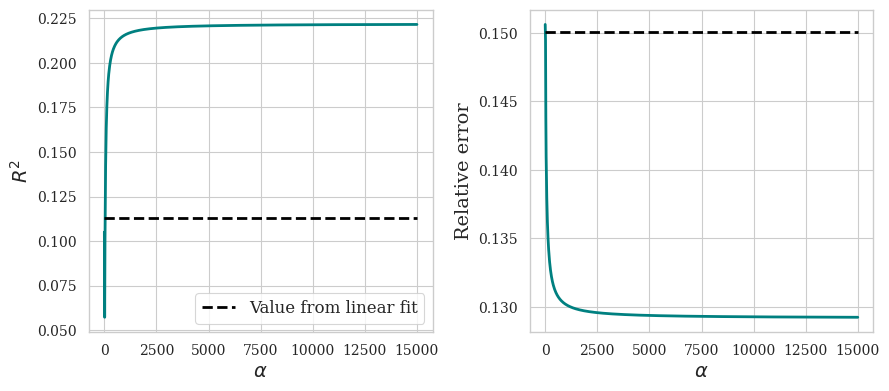

In [9]:
## Let's use ridge regression to fit the train data for 1000 values of alpha
# alpha = 0 means no regularization, and a large value means strong regularization

# choose alpha values 
alpha_list = np.linspace(0.001,15000, 1000)
# make empty arrays to store rsquare and relative error of predictions
rsquared_list = np.empty_like(alpha_list)
rel_error_list = np.empty_like(alpha_list)

for i, alpha in enumerate(alpha_list):
    # instantiate regressor, fit and predict
    reg = Ridge(alpha=alpha)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)

    # calculate the R^2 score and rel error and store the values
    rsquared_list[i] = reg.score(X_test, y_test)
    rel_error_list[i] = np.mean(np.abs(y_test - y_pred) / y_test)

# Let's plot the results
fig, ax = plt.subplots(ncols = 2, figsize=(9,4))
ax[0].plot(alpha_list, rsquared_list)
ax[0].set(xlabel = r'$\alpha$', ylabel = r'$R^2$')
ax[1].plot(alpha_list, rel_error_list,)
ax[1].set(xlabel = r'$\alpha$', ylabel = f'Relative error');
ax[0].hlines(rsquared, 0,15000, ls = '--', color = 'black', label = 'Value from linear fit')
ax[1].hlines(rel_error, 0,15000, ls = '--', color = 'black', label = 'Value from linear fit')
ax[0].legend()
fig.tight_layout()

#### ...much better! 

Relative error: 12.937 %
R squared: 0.221


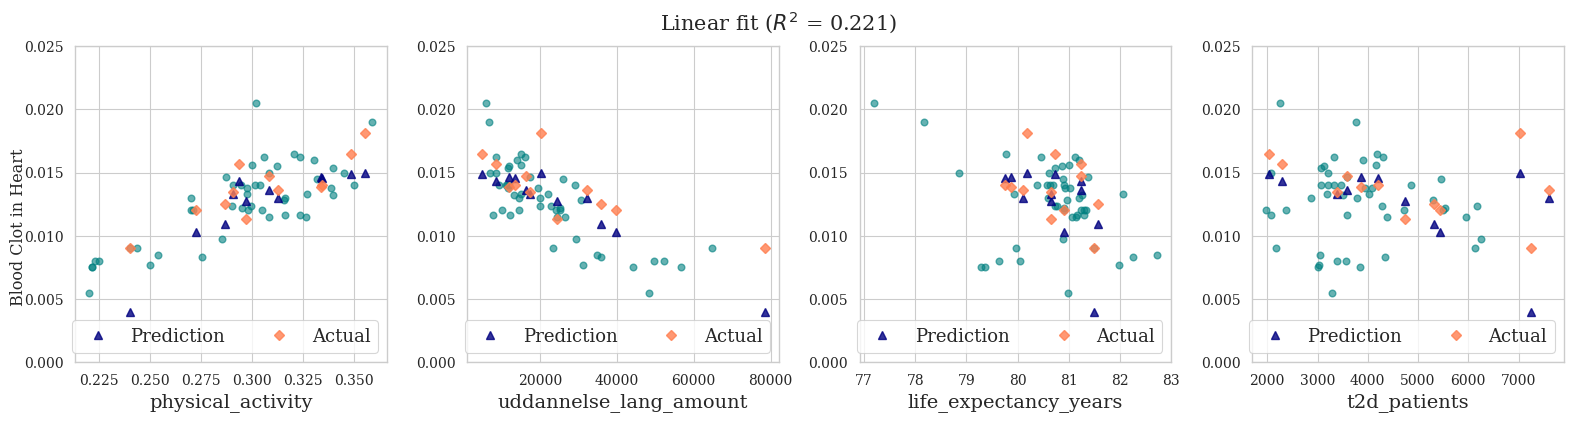

In [10]:
# The hyperparameter optimization tells us that alpha=5000 is a good choice

reg = Ridge(alpha=5000)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

# calculate the R^2 score
rsquared = reg.score(X_test, y_test)
rel_error = np.mean(np.abs(y_test - y_pred) / y_test)

print(f'Relative error: {rel_error * 100 :.3f} %')
print(f'R squared: {rsquared:.3f}')

# get the slope and intercept of the linear regression line
slope = reg.coef_
intercept = reg.intercept_

fig, ax = plt.subplots(ncols = min(4, Nfeatures), figsize=(16,4))
fig.supylabel('Blood Clot in Heart')
for i in range(min(4,Nfeatures)):
    ax[i].set(xlabel=independent_variables[i], ylim=[0,0.025])
    ax[i].plot(X_train[:,i], y_train, 'o', alpha=.6)
    ax[i].plot(X_test[:,i], y_pred, '^', label = 'Prediction', alpha=.8, ms=6)
    ax[i].plot(X_test[:,i], y_test, 'D',  label = 'Actual', alpha=.8,)
    ax[i].legend(ncols=2, loc='lower right', fontsize=13)
   # ax[i].plot(X[:,i], slope[i] * X[:,i] + intercept, color='red', label = 'Ridge fit')

fig.text(0.5, 0.99, rf'Linear fit ($R^2$ = {rsquared:.3f})', fontsize=15, horizontalalignment='center')#, verticalalignment='center', transform=ax.transAxes)
fig.tight_layout();

#### Exercise 1
Try to find the independent parameters that give the best prediction of the blood clot target variable using linear regression, e.g. by 
1) considering which parameters should be good predictors of the risk of getting blood clots, 
2) studying the correlation matrix
3) trial and error


#### Exercise 2
Follow the example of Ridge regression above, but this time use Lasso regression (reg = Lasso(alpha=)) to find the alpha that gives the best fit. Does Lasso outperform Ridge regression in this case?


#### Exercise 3
Use as many features as you want and your favorite regression method to yield the best possible predictions \
 (the enthusiast might want to try out the regressor ElasticNet, which is a combination of Ridge and Lasso regression - see https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) 
